In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Smartphone_Cleaned_Data.csv")

In [3]:
df.head()

,Brand,Name,MRP,Discount_Price,Rating,Total_Rating,Total_Reviews
0,Apple,"APPLE iPhone 14 (Blue, 128 GB)",69900,58999,4.6,247971,9518
1,Apple,"APPLE iPhone 14 (Starlight, 128 GB)",69900,59999,4.6,247971,9518
2,Apple,"APPLE iPhone 14 (Midnight, 128 GB)",69900,59999,4.6,247971,9518
3,Apple,"APPLE iPhone 14 Plus (Midnight, 128 GB)",79900,67999,4.6,55035,3208
4,Apple,"APPLE iPhone 14 Plus (Purple, 128 GB)",79900,67999,4.6,55035,3208


In [4]:
df.tail()

,Brand,Name,MRP,Discount_Price,Rating,Total_Rating,Total_Reviews
145,Google,"Google Pixel 7 (Snow, 128 GB)",59999,40999,4.3,10299,1272
146,Google,"Google Pixel 7 Pro (Snow, 128 GB)",84999,61999,4.3,4670,659
147,Google,"Google Pixel 7 Pro (Hazel, 128 GB)",84999,61999,4.3,4670,659
148,Google,"Google Pixel 7 Pro (Obsidian, 128 GB)",84999,61999,4.3,4670,659
149,Google,"Google Pixel 8 (Rose, 128 GB)",21999,75999,4.3,690,107


In [5]:
df.sample(5)

,Brand,Name,MRP,Discount_Price,Rating,Total_Rating,Total_Reviews
87,Realme,"realme 3i (Diamond Blue, 32 GB)",11999,8499,4.4,304516,26338
106,Oppo,"OPPO A12 (Blue, 32 GB)",10990,9990,4.4,75844,4509
47,Samsung,"SAMSUNG Galaxy S22 5G (Phantom White, 128 GB)",85999,39999,4.4,9710,755
115,Vivo,"vivo Y1S (Olive Black, 32 GB)",10990,7290,3.8,348,24
97,Oppo,"OPPO A11K (Flowing Silver, 32 GB)",10990,8990,4.2,7442,533


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           150 non-null    object 
 1   Name            150 non-null    object 
 2   MRP             150 non-null    int64  
 3   Discount_Price  150 non-null    int64  
 4   Rating          150 non-null    float64
 5   Total_Rating    150 non-null    int64  
 6   Total_Reviews   150 non-null    int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 8.3+ KB


**Inference :**
- The **Brand** and **Name** column has `categorical values`.
- The **MRP**, **Discounted price**,**Rating**,**Total Rating**,**Total Reviews** are all `numeric values`.

In [7]:
# viewing the statistics of the dataframe:

df.describe()

,MRP,Discount_Price,Rating,Total_Rating,Total_Reviews
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,32487.660000,26544.980000,4.355333,78824.400000,5009.246667
std,26464.908634,22955.648012,0.163246,162988.007505,11914.532853
min,2899.000000,2870.000000,3.800000,14.000000,2.000000
25%,12999.000000,8944.250000,4.200000,2425.500000,175.250000
50%,19999.000000,16499.000000,4.300000,13165.000000,1198.000000
75%,44999.000000,39999.000000,4.500000,72938.500000,4509.000000
max,99900.000000,96990.000000,4.700000,919108.000000,71305.000000


In [12]:
df.corr()

,MRP,Discount_Price,Rating,Total_Rating,Total_Reviews
MRP,1.000000,0.932935,0.499179,-0.086838,-0.129303
Discount_Price,0.932935,1.000000,0.580300,-0.068498,-0.115393
Rating,0.499179,0.580300,1.000000,0.254828,0.170396
Total_Rating,-0.086838,-0.068498,0.254828,1.000000,0.974193
Total_Reviews,-0.129303,-0.115393,0.170396,0.974193,1.000000


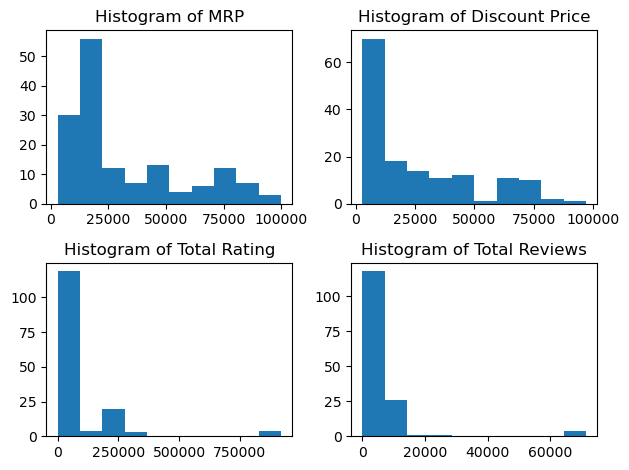

In [8]:
fig,axes =  plt.subplots(2,2)
axes[0,0].hist(df['MRP'])
axes[0,0].set_title("Histogram of MRP")
axes[0,1].hist(df['Discount_Price'])
axes[0,1].set_title("Histogram of Discount Price")
axes[1,0].hist(df['Total_Rating'])
axes[1,0].set_title("Histogram of Total Rating")
axes[1,1].hist(df['Total_Reviews'])
axes[1,1].set_title("Histogram of Total Reviews")
plt.tight_layout()
plt.show();

**Inference :**

- Histogram of **MRP** is `Right Skewed`.
- Histogram of **Discount Price** is `Right Skewed`.
- Histogram of **Total Rating** is `Right Skewed`.
- Histogram of **Total Rating** is `Right Skewed`.

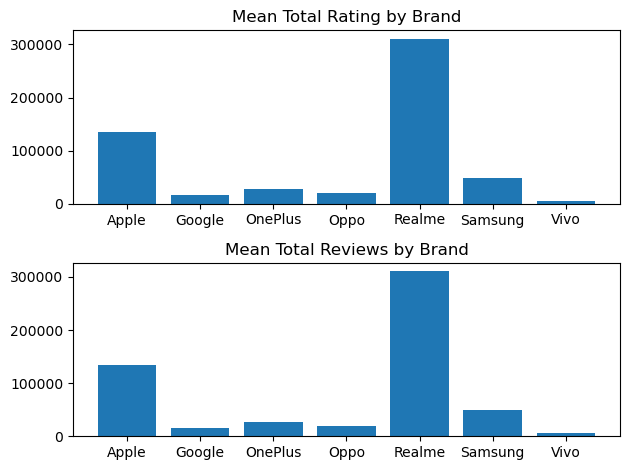

In [11]:
grpb = df.groupby('Brand')['Total_Rating'].agg(['mean'])
grpc = df.groupby('Brand')['Total_Reviews'].agg(['mean'])

fig,axes = plt.subplots(2,1)

axes[0].bar(grpb.index ,grpb['mean'])
axes[0].set_title('Mean Total Rating by Brand')
axes[1].bar(grpc.index,grpb['mean'])
axes[1].set_title('Mean Total Reviews by Brand')
plt.tight_layout()

plt.show();

**Inference :**

- `Realme` smartphone has the **most** number of Ratings and Reviews.
- `Vivo` has the **least** amount of Ratings and Reviews.
- `Apple` is the **second highest** and has fair amount of Ratings and Reviews than the rest of smartphone brands **except Realme**.

In [62]:
df.groupby('Brand')['Brand'].agg(['count']).sort_values('count')

,count
Brand,
Google,15
Realme,19
Vivo,21
Oppo,23
Apple,24
OnePlus,24
Samsung,24


In [57]:
df.groupby('Brand')[['MRP','Discount_Price']].agg(['mean'])

,MRP,Discount_Price
,mean,mean
Brand,,
Apple,73858.333333,66288.041667
Google,51265.666667,42465.800000
OnePlus,30374.000000,29106.791667
Oppo,12863.869565,9494.913043
Realme,9735.842105,7807.263158
Samsung,34325.916667,20666.375000
Vivo,14186.476190,9170.000000
